#### Kaggle API installation:
 - `pip install kaggle`
 - Go to https://github.com/Kaggle/kaggle-api and read the **API credentials part**
 - Register or login in https:/kaggle.com
 - Go to https://www.kaggle.com/c/test-recsys and push **Join Competition**
 
#### Data download
 - Download data `kaggle competitions download -c test-recsys``
 - Unpack data `unzip test-recsys.zip -d data`

In [53]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
def count_plot(df, x, title='', figsize=(18, 6), top=None):
    plt.figure(figsize=(18, 6))
    
    val_cnt = df[x].value_counts()
    val_cnt = val_cnt.iloc[:top] if top else val_cnt

    sns.countplot(data=df, x=x, order=val_cnt.index)
    plt.xticks(rotation=90, fontsize=12)
    if title:
        plt.title(title, fontsize=16)
    else:
        plt.title(f'{x.capitalize()} count', fontsize=16)
    plt.plot()

### Data paths

In [112]:
PATH_TO_PRODUCTS = 'data/sbermarket_tab_2_1/'
PATH_TO_ORDERS = 'data/kaggle_tab_1345/tab_1_orders.csv'
PATH_TO_CATS = 'data/kaggle_tab_1345/tab_3_categories.csv'
PATH_TO_PROD_PROP = 'data/kaggle_tab_1345/tab_5_product_properties.csv'
PATH_TO_USERS = 'data/kaggle_tab_1345/tab_4_user_profiles.csv'
PATH_TO_CITIES = 'data/tab_6_city.csv'
PATH_TO_SMPL_SUBM = 'data/sample_submission.csv'

PRODUCT_TABS = os.listdir(PATH_TO_PRODUCTS)

## Orders

In [12]:
orders_df = pd.read_csv(PATH_TO_ORDERS)

In [62]:
orders_df.head()

,user_id,order_id,order_created_time,retailer,store_id,platform
0,72,17431000,2020-09-26 10:48:57,METRO,21,app
1,83,9718154,2020-05-08 09:46:18,METRO,87,web
2,142,10056850,2020-05-14 15:06:03,METRO,320,app
3,187,15952443,2020-09-01 17:34:00,ВкусВилл,533,app
4,224,10409918,2020-05-20 06:32:50,Ашан,183,web


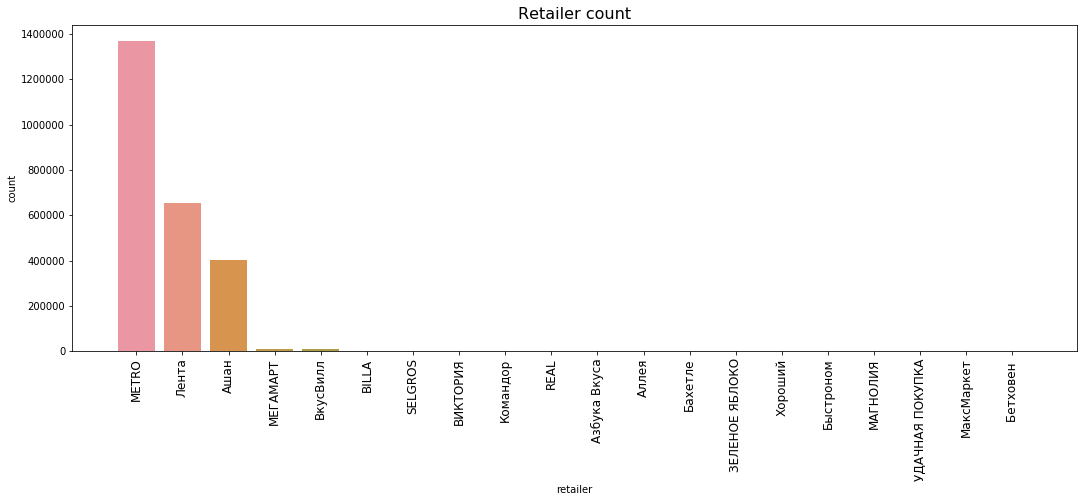

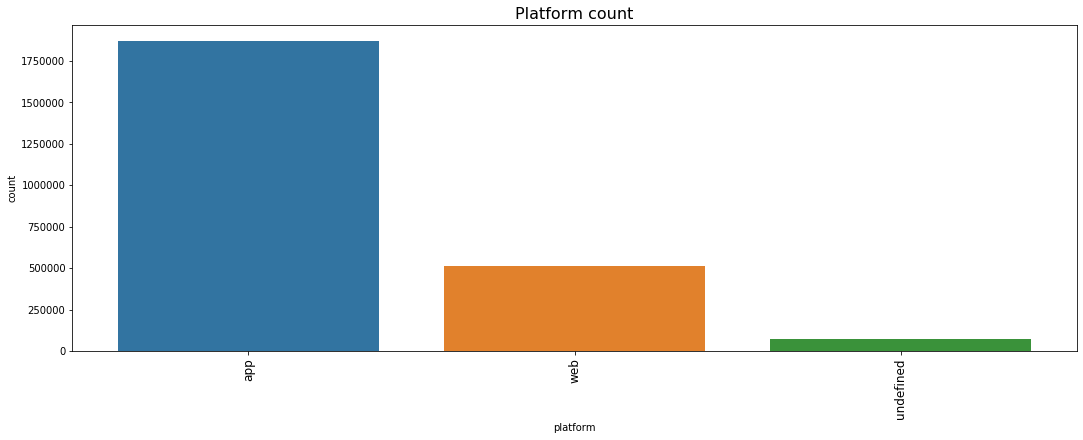

In [89]:
count_plot(orders_df, 'retailer', top=20)
count_plot(orders_df, 'platform')

## Categories

`category` is a higher category level over master_category.

TODO: 
 - *Reorganize the categories data to a tree*, e.g., using the `json` strucure

In [21]:
cat_df = pd.read_csv(PATH_TO_CATS)

In [61]:
cat_df.head(10)

,id,name,parent_id
0,1,Продукты питания,0
1,2,Замороженные продукты,1
2,3,Замороженные овощи и фрукты,2
3,4,Замороженные полуфабрикаты,2
4,5,Рыба замороженная,2
5,6,Мясо замороженное,2
6,7,Мороженое,2
7,8,Пельмени и вареники,2
8,9,Бакалея,1
9,10,"Хлопья, мюсли, сухие завтраки",9


## User profiles

In [25]:
users_df = pd.read_csv(PATH_TO_USERS)

In [69]:
users_df.head()

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN
3,2224895,NaN,NaN
4,930197,NaN,NaN


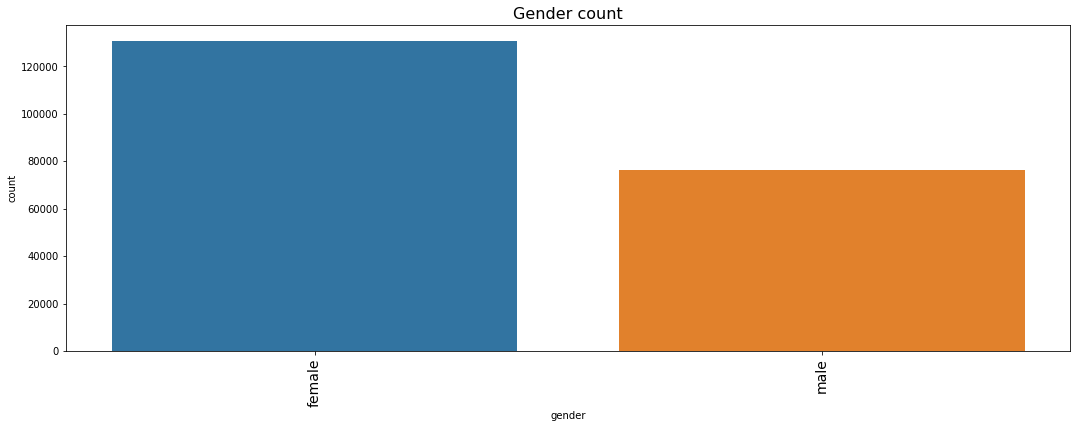

In [64]:
count_plot(users_df, 'gender')

## Product properties

Each product has several properties.

Each properties has `property_nam`e and `property_value`.

Examples of property_name - *Вес (Weight), Вид (Taste), ...* (around 6000 possible variants).

Examples of property_value - *100 г , Черника (Blueberry) etc*.

TODO:
- We neead an idea what to do with this data and how proccess it 

In [30]:
prod_prop_df = pd.read_csv(PATH_TO_PROD_PROP)

In [66]:
prod_prop_df.head()

,product_id,property_name,property_value
0,1,Вес,100 г
1,2,Вид,Молочный напиток
2,2,Вес,100 г
3,2,Вкус,Черника
4,2,Сырье,Натуральное молоко


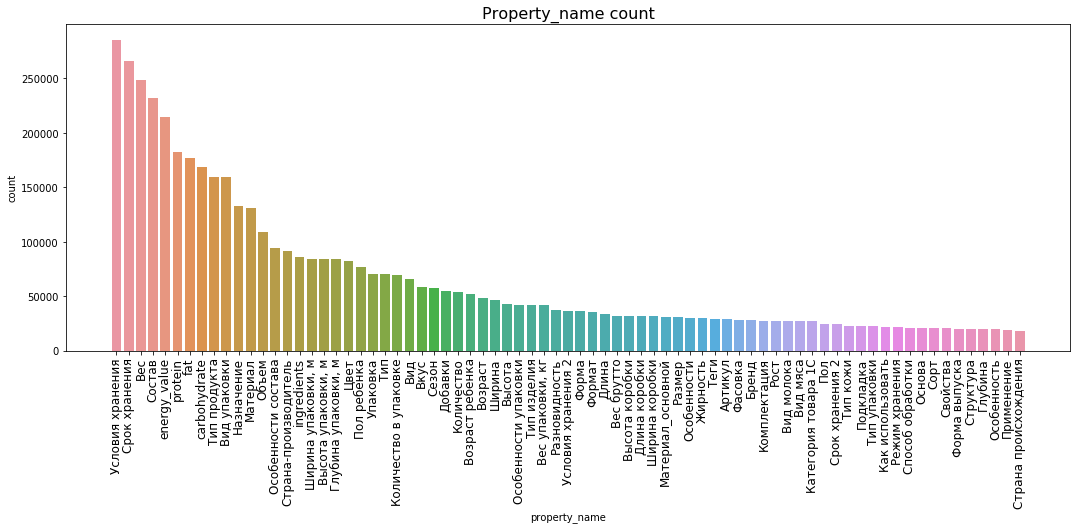

In [107]:
count_plot(prod_prop_df, 'property_name', top=75)

## Cities

In [44]:
cities_df = pd.read_csv(PATH_TO_CITIES)

In [67]:
cities_df.head()

,store_id,city_name
0,14,Москва
1,21,Москва
2,1,Москва
3,4,Москва
4,7,Москва


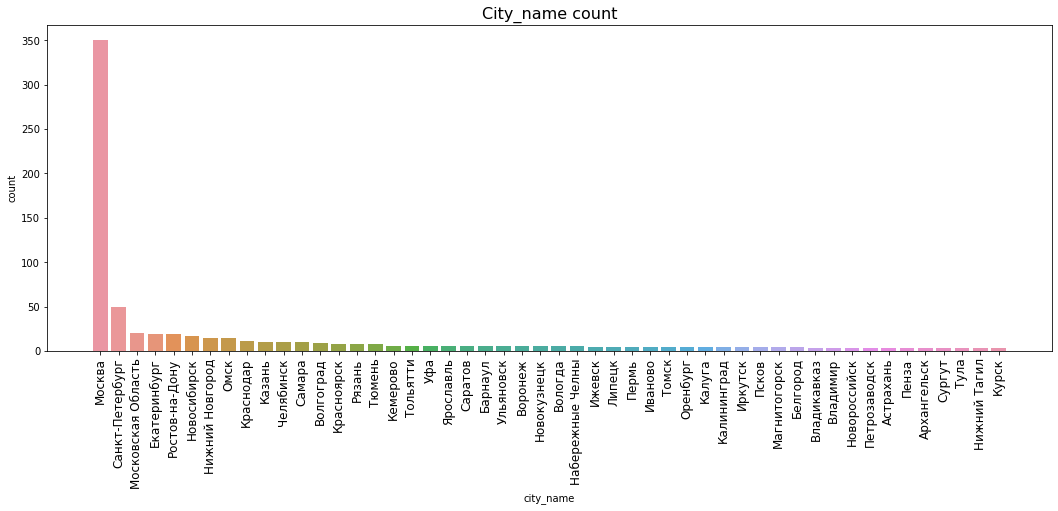

In [106]:
count_plot(cities_df, 'city_name', top=50)

## Products

In [50]:
prod_df = pd.read_csv(os.path.join(PATH_TO_PRODUCTS, PRODUCT_TABS[0]))

In [68]:
prod_df.head()

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
0,65,12864224,130003820,34.990002,1,0.00,Семечки льняные Диет Пром 200 г,2833472,Диет Пром,97.0,94
1,65,12864224,130003821,215.000000,1,0.00,Шоколад Lindt Excellence горький 78%,201286,Lindt,60.0,56
2,65,12864224,130003822,57.900002,3,15.29,"Творог Valio Мягкий обезжиренный 0,1% бзмж",18450,Valio,30.0,20
3,65,12864224,130003823,39.490002,2,0.00,Творог Lactica Мягкий диетический обезжиренный...,18439,Lactica,30.0,20
4,65,12864224,130003824,139.899994,1,0.00,Грейпфрут,105764,Без бренда,91.0,90


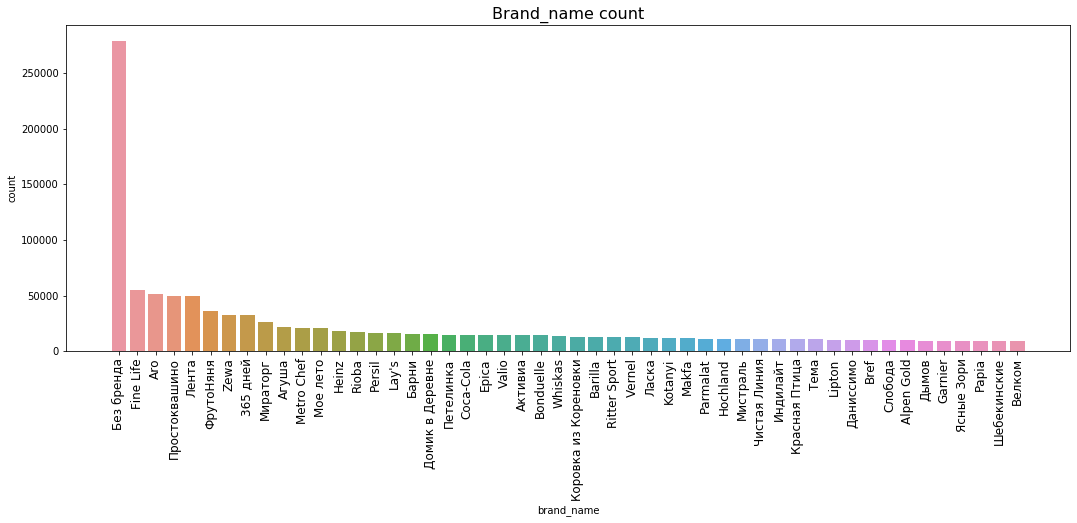

In [111]:
count_plot(prod_df, 'brand_name', top=50)

## Submission

In [113]:
sabm_df = pd.read_csv(PATH_TO_SMPL_SUBM)

In [124]:
len(sabm_df.Predicted[2].split(' '))

50